# Módulo 1: Fundamentos de Big Data

## Instruções para correção de dados ausentes
1. Média arredondada para 2 casas decimais para as variáveis do tipo numéricas.
2. Moda para as variáveis categóricas.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px # biblioteca para criar gráficos dinâmicos
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
caminho_arquivo = '/content/dados_clinicos.csv'
dados_clinicos = pd.DataFrame(pd.read_csv(caminho_arquivo))
dados_clinicos

,id_cliente,peso,colesterol,genero
0,1,102.0,111,Masculino
1,2,115.0,135,Masculino
2,3,115.0,136,Masculino
3,4,140.0,167,Feminino
4,5,130.0,158,Masculino
...,...,...,...,...
585,363,172.0,211,Masculino
586,364,157.0,194,Feminino
587,365,137.0,169,Feminino
588,366,158.0,189,Feminino


In [ ]:
Tamanho = dados_clinicos.shape
print(f"Tamanho:  {Tamanho}\n")

# Encontrar e exibir as linhas duplicadas
Duplicados = dados_clinicos.duplicated().sum()
print(f"Duplicados:  {Duplicados}\n")

# Identifique as linhas duplicadas
duplicadas = dados_clinicos[dados_clinicos.duplicated(keep=False)].sort_values(by='id_cliente')
print(f"Linhas Duplicados: {duplicadas}\n")

# # Encontrar e exibir as linhas duplicadas com base nas colunas 'coluna1' e 'coluna2'
# linhas_duplicadas = dados_clinicos[dados_clinicos.duplicated(subset=['coluna1', 'coluna2'])]
# print(linhas_duplicadas)


# Encontrar e exibir as linhas com valores nulos no DataFrame
dados_ausentes = dados_clinicos.isnull().sum().sort_values(ascending=False)
print(f"Dados Ausentes:\n{dados_ausentes}\n")

linhas_com_nulos = dados_clinicos[dados_clinicos.isnull().any(axis=1)]
print(f"Linhas com Ausentes:\n{linhas_com_nulos}\n")


Tipos= dados_clinicos.dtypes
print(f"Tipos de Dados:  {Tipos}")


Tamanho:  (590, 4)

Duplicados:  43

Linhas Duplicados:      id_cliente   peso  colesterol     genero
349         350  134.0         163  Masculino
572         350  134.0         163  Masculino
573         351  199.0         232  Masculino
350         351  199.0         232  Masculino
351         352  115.0         131  Masculino
..          ...    ...         ...        ...
451         452  117.0         138   Feminino
570         453  145.0         176   Feminino
452         453  145.0         176   Feminino
571         454  106.0         115  Masculino
453         454  106.0         115  Masculino

[86 rows x 4 columns]

Dados Ausentes:
peso          5
id_cliente    0
colesterol    0
genero        0
dtype: int64

Linhas com Ausentes:
     id_cliente  peso  colesterol     genero
63           64   NaN         211  Masculino
101         102   NaN         230   Feminino
146         147   NaN         171  Masculino
195         196   NaN         143   Feminino
215         216   NaN       

In [ ]:
# Calcular a média dos valores numéricos e arredondar para duas casas decimais
media_arredondada = dados_clinicos['peso'].mean().round(2)
print(f'Média: {media_arredondada} \n')

# Preencher os valores nulos na coluna 'peso' com a média arredondada
dados_clinicos['peso'].fillna(media_arredondada, inplace=True)

# Verificar se os valores nulos foram substituídos
# Filtrar o DataFrame pelos IDs especificados
dados_filtrados = dados_clinicos[dados_clinicos['id_cliente'].isin([64, 102, 147, 196, 216])]
print(dados_filtrados)


Média: 143.16 

     id_cliente    peso  colesterol     genero
63           64  143.16         211  Masculino
101         102  143.16         230   Feminino
146         147  143.16         171  Masculino
195         196  143.16         143   Feminino
215         216  143.16         180  Masculino


In [ ]:
#remover duplicados
dados_clinicos = dados_clinicos.drop_duplicates()

# Remover duplicados com base na coluna 'A'
#df_sem_duplicados = df.drop_duplicates(subset=['A'])

# Encontrar e exibir as linhas duplicadas
Duplicados = dados_clinicos.duplicated().sum()
print(f"Duplicados:  {Duplicados}\n")

Duplicados:  0



In [ ]:
dados_clinicos.describe()

,id_cliente,peso,colesterol
count,547.00000,547.000000,547.000000
mean,274.00000,143.438391,170.433272
std,158.04957,30.695360,39.147189
min,1.00000,95.000000,102.000000
25%,137.50000,116.000000,136.000000
50%,274.00000,140.000000,169.000000
75%,410.50000,171.000000,208.000000
max,547.00000,203.000000,235.000000


### Existe correlação entre as variáveis peso e colesterol no dataset?

In [ ]:
#correlação
correlation = dados_clinicos['peso'].corr(dados_clinicos['colesterol'])
correlation

0.9849714555877486

### Qual o comando que transforma um array em matriz?

In [ ]:
# Suponha que você tenha um array unidimensional
df = np.array([1, 2, 3, 4, 5])
print(f'{dados_clinicos}\n')
# Use reshape(-1, 1) para transformar em uma matriz com uma única coluna
matriz_coluna = df.reshape(-1, 1)

print(matriz_coluna)


     id_cliente   peso  colesterol     genero
0             1  102.0         111  Masculino
1             2  115.0         135  Masculino
2             3  115.0         136  Masculino
3             4  140.0         167   Feminino
4             5  130.0         158  Masculino
..          ...    ...         ...        ...
542         543  172.0         207  Masculino
543         544  129.0         157  Masculino
544         545  107.0         115  Masculino
545         546  117.0         147  Masculino
546         547  148.0         176  Masculino

[547 rows x 4 columns]

[[1]
 [2]
 [3]
 [4]
 [5]]


### Elabore um gráfico de dispersão que represente os pesos e os níveis de colesterol de todos os pacientes, agrupados por gênero. No eixo x, represente o peso, enquanto no eixo y, represente o colesterol. Posteriormente, analise os resultados obtidos e selecione o gráfico que melhor ilustra essa relação.

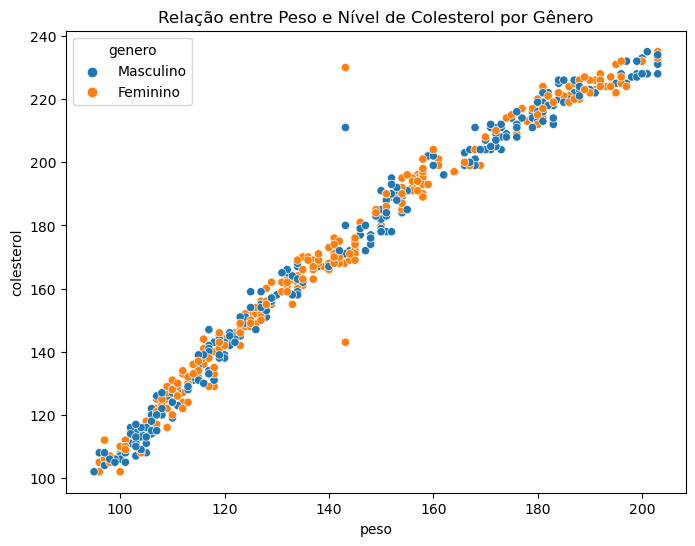

In [ ]:
# Criando o gráfico de dispersão
plt.figure(figsize=(8, 6))
sns.scatterplot(data=dados_clinicos, x='peso', y='colesterol', hue='genero')

# Adicionando título
plt.title('Relação entre Peso e Nível de Colesterol por Gênero')

# Exibindo o gráfico
plt.show()


### Qual é a representação gráfica do modelo de regressão que foi criado? Para gerar o gráfico, leve em consideração o peso no eixo X e o colesterol no eixo Y.

In [ ]:
dados_clinicos_qnt = dados_clinicos[['peso','colesterol']]

In [ ]:
# Criando variável independente
x = dados_clinicos_qnt.iloc[:,0].values #buscamos todos os registros da primeira coluna e convertemos no formato de array
# o comando iloc permite selecionar um conjunto de registros. o dois pontos ":" significa que estamos selecionando todos os regisros e zero "0" a primeira coluna
x

array([102.  , 115.  , 115.  , 140.  , 130.  , 198.  , 114.  , 145.  ,
       191.  , 186.  , 104.  , 188.  ,  96.  , 156.  , 125.  , 178.  ,
       109.  , 168.  , 152.  , 133.  , 153.  , 107.  , 199.  , 140.  ,
        95.  , 183.  , 108.  , 190.  , 174.  , 149.  , 169.  , 138.  ,
       151.  , 109.  , 178.  , 106.  , 195.  ,  96.  , 129.  , 166.  ,
       197.  , 148.  , 117.  , 193.  , 170.  , 130.  , 183.  , 134.  ,
       128.  , 105.  , 115.  , 166.  , 183.  , 149.  , 110.  , 164.  ,
       157.  , 170.  , 124.  , 145.  , 113.  , 150.  , 100.  , 143.16,
       139.  , 150.  , 101.  , 157.  , 187.  , 137.  , 121.  , 132.  ,
       130.  , 156.  , 180.  , 100.  , 122.  , 185.  , 113.  , 123.  ,
       119.  , 113.  , 168.  , 126.  , 102.  , 116.  , 144.  , 140.  ,
       124.  , 108.  , 154.  , 185.  , 106.  ,  97.  ,  96.  , 129.  ,
       124.  , 149.  ,  97.  , 102.  , 146.  , 143.16, 100.  , 118.  ,
       179.  , 179.  , 113.  , 142.  , 101.  , 174.  , 131.  , 179.  ,
      

In [ ]:
#criando variável dependente (o que queremos predizer)
y = dados_clinicos_qnt.iloc[:,1].values
y

array([111, 135, 136, 167, 158, 227, 131, 176, 223, 221, 116, 222, 102,
       192, 152, 213, 125, 204, 189, 163, 189, 122, 228, 168, 102, 218,
       123, 222, 208, 183, 204, 167, 188, 126, 213, 122, 225, 105, 155,
       203, 225, 177, 139, 224, 207, 158, 218, 164, 154, 118, 138, 199,
       219, 183, 128, 197, 196, 208, 152, 175, 129, 185, 107, 211, 167,
       185, 110, 194, 221, 166, 143, 163, 158, 191, 216, 106, 146, 220,
       131, 147, 141, 130, 204, 152, 111, 139, 172, 168, 148, 123, 189,
       220, 120, 106, 105, 157, 149, 185, 106, 115, 177, 230, 108, 140,
       214, 216, 130, 169, 110, 209, 162, 214, 145, 116, 209, 116, 139,
       143, 168, 158, 232, 136, 180, 228, 222, 117, 224, 104, 195, 156,
       213, 133, 208, 195, 163, 195, 124, 231, 172, 104, 221, 128, 222,
       214, 184, 204, 171, 195, 132, 214, 123, 233, 107, 162, 204, 227,
       185, 142, 225, 212, 161, 220, 168, 155, 125, 144, 201, 222, 189,
       132, 204, 201, 211, 156, 179, 129, 185, 107, 213, 172, 19

#### Qual é o valor do coeficiente angular do modelo gerado?

In [ ]:
coeficientes = np.corrcoef(x,y) # retorna matriz
coeficientes

#R: correlação positiva

array([[1.        , 0.98497146],
       [0.98497146, 1.        ]])

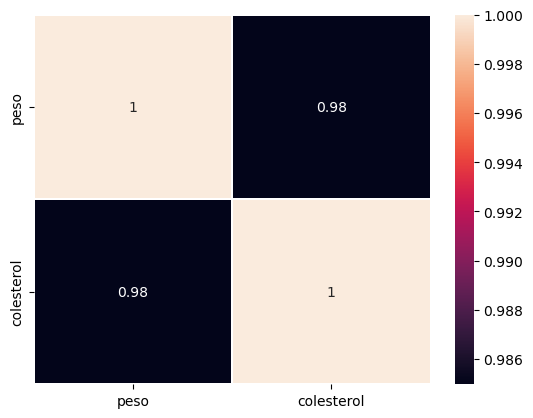

In [ ]:
#Correlação
correlation = dados_clinicos_qnt.corr()
# plot da matriz de correlação
plot = sns.heatmap(correlation, annot = True,  linewidths=.3) #annot = valores
plot;

In [ ]:
#vizualiar o formato da variável
print(f'x = {x.shape} \n')
print(f'y = {y.shape}')

x = (547,) 

y = (547,)


In [ ]:
x = x.reshape(-1,1)
x

array([[102.  ],
       [115.  ],
       [115.  ],
       [140.  ],
       [130.  ],
       [198.  ],
       [114.  ],
       [145.  ],
       [191.  ],
       [186.  ],
       [104.  ],
       [188.  ],
       [ 96.  ],
       [156.  ],
       [125.  ],
       [178.  ],
       [109.  ],
       [168.  ],
       [152.  ],
       [133.  ],
       [153.  ],
       [107.  ],
       [199.  ],
       [140.  ],
       [ 95.  ],
       [183.  ],
       [108.  ],
       [190.  ],
       [174.  ],
       [149.  ],
       [169.  ],
       [138.  ],
       [151.  ],
       [109.  ],
       [178.  ],
       [106.  ],
       [195.  ],
       [ 96.  ],
       [129.  ],
       [166.  ],
       [197.  ],
       [148.  ],
       [117.  ],
       [193.  ],
       [170.  ],
       [130.  ],
       [183.  ],
       [134.  ],
       [128.  ],
       [105.  ],
       [115.  ],
       [166.  ],
       [183.  ],
       [149.  ],
       [110.  ],
       [164.  ],
       [157.  ],
       [170.  ],
       [124.  

Aplicando os dados ao algoritmo de machine de regressão

In [ ]:
# cria um objeto do tipo regressão linear
previsao = LinearRegression()

In [ ]:
type(previsao)

sklearn.linear_model._base.LinearRegression

### Treinamento

com todos os dados

In [ ]:
previsao.fit(x, y) #modelo

LinearRegression()

In [ ]:
# Verfificando a interceptação - constante alpha
previsao.intercept_

-9.751008392436944

In [ ]:
'''
O coeficiente angular é o coeficiente que multiplica a variável independente no modelo de regressão linear.
Ele representa a mudança esperada na variável dependente para uma unidade de mudança na variável independente.
'''
#Verificando o coeficiente angular da reta - Beta
previsao.coef_

array([1.2561789])

In [ ]:
# Inicializar e ajustar o modelo de regressão linear
previsao = LinearRegression()
previsao.fit(x, y)

# Acessar o coeficiente angular (coeficiente de inclinação)
coef_angular = previsao.coef_[0]

print("Coeficiente Angular:", coef_angular)

Coeficiente Angular: 1.256178901956939


In [ ]:
previsao_treino = previsao.predict(x)# baseado nos valores de nº de pessoas, vamos estimar/prever
previsao_treino

array([118.37923961, 134.70956533, 134.70956533, 166.11403788,
       153.55224886, 238.9724142 , 133.45338643, 172.39493239,
       230.17916188, 223.89826737, 120.89159741, 226.41062518,
       110.8421662 , 186.21290031, 147.27135435, 213.84883616,
       127.17249192, 201.28704714, 181.18818471, 157.32078557,
       182.44436361, 124.66013412, 240.2285931 , 166.11403788,
       109.58598729, 220.12973067, 125.91631302, 228.92298298,
       208.82412055, 177.419648  , 202.54322604, 163.60168008,
       179.9320058 , 127.17249192, 213.84883616, 123.40395521,
       235.20387749, 110.8421662 , 152.29606996, 198.77468933,
       237.71623529, 176.1634691 , 137.22192314, 232.69151969,
       203.79940494, 153.55224886, 220.12973067, 158.57696447,
       151.03989106, 122.14777631, 134.70956533, 198.77468933,
       220.12973067, 177.419648  , 128.42867082, 196.26233153,
       187.46907921, 203.79940494, 146.01517545, 172.39493239,
       132.19720753, 178.6758269 , 115.8668818 , 170.08

### Visualizando no gráfico as disposições dos dados

In [ ]:
x.ravel() # transforma de matriz para vetor(array) - (para usar o gráfico)

array([102.  , 115.  , 115.  , 140.  , 130.  , 198.  , 114.  , 145.  ,
       191.  , 186.  , 104.  , 188.  ,  96.  , 156.  , 125.  , 178.  ,
       109.  , 168.  , 152.  , 133.  , 153.  , 107.  , 199.  , 140.  ,
        95.  , 183.  , 108.  , 190.  , 174.  , 149.  , 169.  , 138.  ,
       151.  , 109.  , 178.  , 106.  , 195.  ,  96.  , 129.  , 166.  ,
       197.  , 148.  , 117.  , 193.  , 170.  , 130.  , 183.  , 134.  ,
       128.  , 105.  , 115.  , 166.  , 183.  , 149.  , 110.  , 164.  ,
       157.  , 170.  , 124.  , 145.  , 113.  , 150.  , 100.  , 143.16,
       139.  , 150.  , 101.  , 157.  , 187.  , 137.  , 121.  , 132.  ,
       130.  , 156.  , 180.  , 100.  , 122.  , 185.  , 113.  , 123.  ,
       119.  , 113.  , 168.  , 126.  , 102.  , 116.  , 144.  , 140.  ,
       124.  , 108.  , 154.  , 185.  , 106.  ,  97.  ,  96.  , 129.  ,
       124.  , 149.  ,  97.  , 102.  , 146.  , 143.16, 100.  , 118.  ,
       179.  , 179.  , 113.  , 142.  , 101.  , 174.  , 131.  , 179.  ,
      

In [ ]:
y

array([111, 135, 136, 167, 158, 227, 131, 176, 223, 221, 116, 222, 102,
       192, 152, 213, 125, 204, 189, 163, 189, 122, 228, 168, 102, 218,
       123, 222, 208, 183, 204, 167, 188, 126, 213, 122, 225, 105, 155,
       203, 225, 177, 139, 224, 207, 158, 218, 164, 154, 118, 138, 199,
       219, 183, 128, 197, 196, 208, 152, 175, 129, 185, 107, 211, 167,
       185, 110, 194, 221, 166, 143, 163, 158, 191, 216, 106, 146, 220,
       131, 147, 141, 130, 204, 152, 111, 139, 172, 168, 148, 123, 189,
       220, 120, 106, 105, 157, 149, 185, 106, 115, 177, 230, 108, 140,
       214, 216, 130, 169, 110, 209, 162, 214, 145, 116, 209, 116, 139,
       143, 168, 158, 232, 136, 180, 228, 222, 117, 224, 104, 195, 156,
       213, 133, 208, 195, 163, 195, 124, 231, 172, 104, 221, 128, 222,
       214, 184, 204, 171, 195, 132, 214, 123, 233, 107, 162, 204, 227,
       185, 142, 225, 212, 161, 220, 168, 155, 125, 144, 201, 222, 189,
       132, 204, 201, 211, 156, 179, 129, 185, 107, 213, 172, 19

In [ ]:
grafico = px.scatter(x = x.ravel(), y = y)
grafico.show()

In [ ]:
grafico = px.scatter(x = x.ravel(), y = y)
grafico.add_scatter(x = x.ravel(), y = previsao_treino, name= 'previsões') # linha de projeção
grafico.show()

In [ ]:
coeficientes = np.polyfit(dados_clinicos['peso'], dados_clinicos['colesterol'], 1)
coef_angular = coeficientes[0]
coef_angular

'''
Neste código, np.polyfit(x, y, 1) ajusta um modelo de regressão linear aos dados de entrada x e y. O valor 1 indica que estamos ajustando um modelo de primeira ordem, ou seja, uma linha reta. O coeficiente angular
(inclinação da reta) é o primeiro coeficiente retornado por np.polyfit(), que é acessado através do índice 0.
'''

1.2561789019569383

#### Qual a previsão de colesterol para uma pessoa que pesa 220 quilos?


In [ ]:
modelo = LinearRegression()
modelo.fit(x, y)

# Acessar o coeficiente angular (inclinação da reta)
coef_angular = modelo.coef_

print("Coeficiente Angular:", coef_angular)

Coeficiente Angular: [1.2561789]


In [ ]:
# Ajustar o modelo de regressão linear
previsao = LinearRegression()
previsao.fit(x, y)

# Acessar os coeficientes
intercepto = previsao.intercept_
coeficientes = previsao.coef_

print("Intercepto:", intercepto)
print("Coeficientes:", coeficientes)

# Agora, você pode fazer previsões com base no modelo ajustado
peso = 220
previsao = intercepto + coeficientes * peso
print("Previsão:", previsao)

Intercepto: -9.751008392436944
Coeficientes: [1.2561789]
Previsão: [266.60835004]


#### Qual é a diferença entre o valor previsto e o valor real do colesterol para um indivíduo com peso de 95 quilos?


In [ ]:
# Retornar o valor do colesterol para pessoas com peso de 95 quilos
valor_colesterol = dados_clinicos_qnt.loc[dados_clinicos_qnt['peso'] == 95, 'colesterol'].values[0]
print("Valor do colesterol para pessoas com peso de 95 quilos:", valor_colesterol)

# Previsão do colesterol para o peso de 95 quilos:
peso = 95  # Corrigido para 95, que é o peso que estamos considerando
previsao = intercepto + coeficientes * peso
print("Previsão do colesterol para um peso de 95 quilos:", previsao)

# Calcular e exibir a diferença entre o valor real e a previsão
diferenca = previsao - valor_colesterol
print(f'A diferença é de {diferenca}')



Valor do colesterol para pessoas com peso de 95 quilos: 102
Previsão do colesterol para um peso de 95 quilos: [109.58598729]
A diferença é de [7.58598729]


#### Qual foi o score do modelo gerado?

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np

'''
 O método score() é comumente usado com modelos de regressão linear da biblioteca scikit-learn.

Se previsao_treino é o seu modelo de regressão linear ajustado usando scikit-learn, você deve usar
este modelo para calcular o score
'''

# Ajustar o modelo de regressão linear
modelo = LinearRegression()
modelo.fit(x, y)

# Prever valores
y_pred = modelo.predict(x)

# Calcular o score do modelo (coeficiente de determinação R²)
score_do_modelo = r2_score(y, y_pred)
print("Score do modelo (R²):", score_do_modelo)

mae = mean_absolute_error(y, y_pred)
print("Mean Absolute Error (MAE) do modelo:", mae)

Score do modelo (R²): 0.9701687683226481
Mean Absolute Error (MAE) do modelo: 4.982918135475773


#### Qual o valor do mean absolute error do modelo criado?

In [ ]:
'''
Mean Absolute Error (MAE) de um modelo de regressão linear ajustado. No entanto, parece que você está usando a
variável previsao_treino para fazer as previsões, mas não a definiu previamente.

Se previsao_treino é o nome do seu modelo de regressão linear já ajustado, então o código está correto.
No entanto, se previsao_treino ainda não foi definido e você está tentando fazer as previsões usando um modelo diferente,
você precisa substituir previsao_treino pelo nome correto do seu modelo.
'''
from sklearn.metrics import mean_absolute_error

# Suponha que 'modelo' seja o seu modelo de regressão linear já ajustado
# Suponha também que 'X' e 'y' são os dados usados para ajustar o modelo

# Fazer previsões com o modelo
previsoes = modelo.predict(x)

# Calcular o mean absolute error
mae = mean_absolute_error(y, previsoes)
print("Mean Absolute Error (MAE) do modelo:", mae)


Mean Absolute Error (MAE) do modelo: 4.982918135475773


In [ ]:
# Peso da pessoa para a qual você deseja fazer a previsão (em quilos)
peso = 220

# Criar um vetor de características com o peso da pessoa
vetor_caracteristicas = [[peso]]

# Fazer a previsão usando o modelo
previsao_colesterol = modelo.predict(vetor_caracteristicas)

print("Previsão de colesterol para uma pessoa que pesa 220 quilos:", previsao_colesterol)


Previsão de colesterol para uma pessoa que pesa 220 quilos: [266.60835004]
